In [49]:
#Instalación de Librerias
import pandas as pd
import numpy as np
import math
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
import scipy.stats as stats
from scipy import stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest, t, levene, bartlett, chi2_contingency
from scipy.stats import ks_2samp
from scipy.stats import bartlett
# -----------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar todas las advertencias FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 

# Fase 1: Exploración y Limpieza
## 1. Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.

In [2]:
df_flight = pd.read_csv("data/Customer Flight Activity.csv")
df_loyalty = pd.read_csv("data/Customer Loyalty History.csv")

### 1. Exploración inicial:
### *A) Fichero Flight*

In [3]:
df_flight.head() 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_flight.info() # saca informacion de las columnas, los valores no nulos y su tipo de dato según la columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
df_flight.isnull().sum() # verificamos que no hay nulos junto con .info()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [6]:
# ver que columnas tienen valores nulos
df_flight.duplicated().sum()

1864

In [7]:
duplicated_rows = df_flight[df_flight.duplicated(keep=False)] # atributo keep nos muestra todas las filas duplicadas y sus repeticiones
duplicated_rows

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [8]:
# Eliminar duplicados en flight y modificar el dataframe original, he eliminado porque hay repetidos por clientes y fecha sin vuelos asociados.
df_flight.drop_duplicates(inplace=True)

# Resetear el índice del dataframe después de eliminar duplicados
df_flight.reset_index(drop=True)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0
403756,999911,2018,12,0,0,0,0,0.0,0,0
403757,999940,2018,12,3,0,3,1233,123.0,0,0
403758,999982,2018,12,0,0,0,0,0.0,0,0


In [9]:
df_flight["Loyalty Number"].duplicated().sum() # he querido ver si sigue habiendo duplicados por loyalty card, que seria el ID
#vemos que si hay pero tiene sentido porque son de una misma persona reserva más de 1 vuelo, estos los dejamos.

387023

In [10]:
print(f"En el DataFrame tenemos un total de {df_flight.shape[0]} filas y {df_flight.shape[1]} columnas.")

En el DataFrame tenemos un total de 403760 filas y 10 columnas.


In [11]:
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [12]:
df_flight.describe().T # por defecto para las variables numéricas que son el 100% de nuestras columnas

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


## Datos fichero flight

- Year y Month: Los años que trata el fichero son de 2017 a 2018.

El resumen de los estadisticos es el siguiente para Flights Booked, Flights with Companions y Total Flights:
- mean: Las medias de 4.13 para Flights Booked, 1.04 para Flights with Companions, y 5.17 para Total Flights.
- std: Las desviaciones estándar de 5.23 para Flights Booked, 2.08 para Flights with Companions, y 6.53 para Total Flights muestran la dispersión de los datos alrededor de la media, indican alta dispersión. * Si la desviación estándar es más de la mitad de la media (0.5 veces la media), esto puede considerarse como una indicación de alta dispersión.
- min: Los valores mínimos de 0 indican que hay registros donde no se reservaron vuelos.
- max: Los valores máximos para Flights Booked es de 21,para Flights with Companions es de 11, y 32 para Total Flights indican los máximos de estas variables.

Distance: La media de 1.214,46 indica la distancia promedio de los vuelos reservados.
std: La desviación estándar de 1,434.10 muestra la variabilidad de las distancias de vuelo.
min: El valor mínimo de 0 indica que hay registros sin distancia de vuelo.

- Points Accumulated:se refiere a la cantidad total de puntos que un cliente ha acumulado.
- Points Redeemed:se refiere a la cantidad de puntos que un cliente ha canjeado.
- Dollar Cost Points Redeemed: Indica el valor en dólares de los puntos que han sido canjeados.

        - mean: Las medias de 124,26 para Points Accumulated, 30,84 para Points Redeemed, y 2,50 para Dollar Cost Points Redeemed
        - std: Las desviaciones estándar de 146,70 para Points Accumulated, significa que los puntos acumulados tienden a estar dispersos alrededor de la media de puntos, la desviación de Points Redeemed es 125,76 e indica que los valores de los puntos canjeados varían bastante de un caso a otro. Para Dollar Cost Points Redeeme la desviación es 10,17 y por lo tanto estos valores estan más cerca de la media auqnue sigue habiendo dispersion alta.
        - min: Los valores mínimos de 0 indican que hay registros sin puntos acumulados, puntos canjeados, o costos en dólares de puntos canjeados.
        - max: Los valores máximos de 676,5 para Points Accumulated, 876.0 para Points Redeemed, y 71.0 para Dollar Cost Points Redeemed

### *B) Fichero Loyalty*

In [13]:
df_loyalty.head() 

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [14]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

- Vemos que hay 3 columnas con nulos ["Salary", "Cancellation Year", "Cancellation Month"], adicionalmente hay que cambiar los tipos de datos de Cancellation Year a int porque está en decimal.

In [15]:
df_loyalty.isnull().sum() # confirmamos información del método info()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Tres columnas con nulos que gestionaré después.

In [16]:
df_loyalty.duplicated().sum() # no tenemos filas duplicadas

0

In [17]:
print(f"En el DataFrame tenemos un total de {df_loyalty.shape[0]} filas y {df_loyalty.shape[1]} columnas.")

En el DataFrame tenemos un total de 16737 filas y 16 columnas.


In [18]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [19]:
df_loyalty.describe().T # por defecto para las variables numéricas 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [20]:
df_loyalty.describe(include=object).T # para las variables categóricas

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [21]:
# creamos una variable con los nombres de las columnas del DataFrame de las variables categóricas
columnas_categoricas =  ["Country","Province","City","Postal Code","Gender","Education","Marital Status", "Loyalty Card","Enrollment Type"]
print(f"Las columnas del DataFrame de variables categóricas son {columnas_categoricas}")

# empezamos a iterar por cada una de las columnas para sacar sus valores únicos y sus frecuencias
for columna in columnas_categoricas:
    print(f"Sus valores únicos son: {df_loyalty[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_loyalty[columna].value_counts()} ")

Las columnas del DataFrame de variables categóricas son ['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']
Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Country
Canada    16737
Name: count, dtype: int64 
Sus valores únicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Las frecuencias de los valores únicos de las categorías son: Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64 
Sus valores únicos son: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 

- Tras ver los valores únicos de cada columna, veo que en la columna Country sólo hay un valor único que es Cánada por lo que la eliminaré y también hay que normalizar los datos de salary porque hay valor negativo.

## Datos fichero Loyalty

### Salary

    - mean: El promedio del salario es 79.245,61
    - std o desviación media: Es igual 35.008,30 es grande en comparación con la media, lo que sugiere que los salarios varían significativamente alrededor de este valor promedio.
    - min: El valor mínimo de -58.486, luego lo transformaremos.
    - Analisis de los cuartiles:  El 50% de los salarios están por debajo de 73.455.
    - max: El valor máximo es 407228.
### CLV - cantidad total de ingresos que se espera que un pasajero frecuente genere para la aerolínea.

    - mean: El ingreso medio de los clientes a la compañçia es 7.988,90
    - std o desviación media: Es igual 6.860.98 indica que los valores estan bastante dispersos alrededor de la media.
    - min: El valor mínimo de 1.898,01
    - Analisis de los Cuartiles El 50% de los registros de CLV tienen un valor igual o inferior a 5.780,18 
    - max: 83.325,38

### Enrollment Year y Enrollment Month

    - mean: el año mínimo del fichero en el que se unen al programa Loyalty es 2012 y el máximo 2018.
    - el mes con el 50% de entradas hechas del año es en el mes de julio.


### Cancellation Year


    - mean: El promedio de las cancelaciones es en el año 2016.
    - std o desviación media: Es igual 1.38 indica que los valores estan bastante dispersos alredredor de la media.
    - min: El registro más antiguo es del año 2013 y el más reciente de 2018.

### Cancellation Month



    - mean : El promedio de las cancelaciones es para el año 6.96.
    - std o desviación media: Es igual 3.46 indica que los valores estan bastante dispersos alredredor de la media


## 1.1.2 Unión de datos

In [22]:
# uno los ficheros con un left, ya que de esta forma aseguramos toda la información del fichero de los vuelos
# Un mismo cliente puede realizar varios vuelos.
df_merge = pd.merge(df_flight, df_loyalty, on='Loyalty Number', how='left')

In [23]:
df_merge.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [24]:
df_merge.shape

(403760, 25)

## 1.2 Limpieza y Normalización de datos
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
 Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los
datos para el análisis estadístico.

Prefiero normalizar los datos antes de eliminar o imputar nulos por si al normalizar los datos cambiaran. CAMBIOS:
- Normalizar nombre columnas a minúsculas
- Cambiar las columnas enrolloment, cancellation y month a meses
- Normalizar datos columna salary porque hay datos negativos
- Cambiar los datos de las columnas distance, points redeemed,dollar cost points redeemed a float.
- Eliminar columna country

In [25]:
# Cambiar los nombres de las columnas a minúsculas
df_merge.columns = df_merge.columns.str.lower()


In [26]:
df_merge.head()

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [27]:
# Vamos a cambiar los meses de enrolloment, cancellation y month a meses en lugar de números para hacerlo más entendible
month_names = {
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'
}
columns_to_convert = ["enrollment month", "cancellation month", "month"]

# Aplicar el diccionario a cada columna
for col in columns_to_convert:
    df_merge[col] = df_merge[col].map(month_names) # Usamos map para aplicar el valor del diccionario de meses a cada columna de map
df_merge.head(2)


,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
0,100018,2017,January,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,August,NaN,NaN
1,100102,2017,January,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,March,NaN,NaN


In [28]:
# Cambiar a números positivos la columna salary asumiendo que es un error al introducir los datos.
df_merge["salary"] = df_merge["salary"].abs() # función para números absolutos

# Comprobamos que se hayan cambiado:
negativos_salary_data = df_merge["salary"] < 0
print(f"Valores negativos en la columna salary son: {len(df_loyalty[negativos_salary_data])}")

Valores negativos en la columna salary son: 0


/tmp/ipykernel_203881/2744003701.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Valores negativos en la columna salary son: {len(df_loyalty[negativos_salary_data])}")


In [29]:
# Cambiamos a float estas columnas para dar homogeneidad a los datos
df_merge[["distance", "points redeemed","dollar cost points redeemed"]] = df_merge[["distance", "points redeemed","dollar cost points redeemed"]].astype(float)

In [30]:
#Eliminiacion de la columna country ya que es siempre el mismo valor "Canada"
df_final = df_merge.drop("country", axis=1)
df_final.info()
df_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  object 
 3   flights booked               403760 non-null  int64  
 4   flights with companions      403760 non-null  int64  
 5   total flights                403760 non-null  int64  
 6   distance                     403760 non-null  float64
 7   points accumulated           403760 non-null  float64
 8   points redeemed              403760 non-null  float64
 9   dollar cost points redeemed  403760 non-null  float64
 10  province                     403760 non-null  object 
 11  city                         403760 non-null  object 
 12  postal code                  403760 non-null  object 
 13 

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
0,100018,2017,January,3,0,3,1521.0,152.0,0.0,0.0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,August,NaN,NaN
1,100102,2017,January,10,4,14,2030.0,203.0,0.0,0.0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,March,NaN,NaN
2,100140,2017,January,6,0,6,1200.0,120.0,0.0,0.0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,July,NaN,NaN
3,100214,2017,January,0,0,0,0.0,0.0,0.0,0.0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,August,NaN,NaN
4,100272,2017,January,0,0,0,0.0,0.0,0.0,0.0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,January,NaN,NaN


## 1.2.1 Gestión de nulos de fichero Loyalty

In [31]:
# Valores nulos en flight recordamos son 0
print("Porcentaje de valores nulos en flight:")
print((df_flight.isnull().sum() / len(df_flight)) * 100)

Porcentaje de valores nulos en flight:
Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


In [32]:
print("Porcentaje de valores nulos en loyalty:")
print((df_loyalty.isnull().sum() / len(df_loyalty)) * 100 )

Porcentaje de valores nulos en loyalty:
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64


### Vamos a tratar las 3 columnas con nulos : Salary , Cancellation Year y Cancellation Month

In [33]:
# Calculo la media, la mediana de la Columna 'salary' para saber que es mejor imputar
mean_salary = df_final["salary"].mean()
median_salary = df_final["salary"].median()


print(f'La media de la columna Salary es: {np.round(mean_salary, 2)}') 
print(f'La mediana de la columna Salary es: {median_salary}')


La media de la columna Salary es: 79371.73
La mediana de la columna Salary es: 73479.0


In [87]:
# Imputo la mediana en la columna 'salary' por ser el valor que no está influenciado por extremos

df_final["salary"] = df_final["salary"].fillna(np.round(mean_salary, 2))
    
# comprobamos si quedan nulos 
print("Después del reemplazo usando fillna quedan los siguientes nulos")
df_final["salary"].isnull().sum()

Después del reemplazo usando fillna quedan los siguientes nulos


0

In [92]:
""" Como no he podido cambiar el tipo de dato de 'Cancellation_Year', 'Cancellation_Month'a int sin imputar los nulos NaN, lo hago aqui 
al imputar los nulos por Unknown, prefiero eso que eliminar las columnas a pesar de tener un 87% de nulos para al menos usar esos datos que tiene 
la columna"""


df_final['cancellation month'].fillna('Unknown', inplace=True)
df_final['cancellation year'].fillna('Unknown', inplace=True)

# ahora podemos cambiar el tipo float a int64.
df_final[["cancellation year", "cancellation month"]] = df_final[["cancellation year", "cancellation month"]].astype(object)

df_final.dtypes

loyalty number                   int64
year                             int64
month                           object
flights booked                   int64
flights with companions          int64
total flights                    int64
distance                       float64
points accumulated             float64
points redeemed                float64
dollar cost points redeemed    float64
province                        object
city                            object
postal code                     object
gender                          object
education                       object
salary                         float64
marital status                  object
loyalty card                    object
clv                            float64
enrollment type                 object
enrollment year                  int64
enrollment month                object
cancellation year               object
cancellation month              object
dtype: object

In [93]:
df_final["cancellation year"].value_counts()

cancellation year
Unknown    354110
2018.0      15519
2017.0      12147
2016.0      10248
2015.0       6360
2014.0       4344
2013.0       1032
Name: count, dtype: int64

In [38]:
df_final["cancellation month"].value_counts()

cancellation month
Unknown      354110
December       5112
November       5095
August         4992
July           4480
October        4322
September      4224
June           3960
January        3727
March          3579
May            3559
February       3336
April          3264
Name: count, dtype: int64

In [94]:
df_final.sample(10)

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
77838,668599,2017,May,0,0,0,0.0,0.00,0.0,0.0,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,65986.0,Married,Nova,3781.69,Standard,2017,April,Unknown,Unknown
55278,363483,2017,April,0,0,0,0.0,0.00,0.0,0.0,Ontario,Toronto,M2Z 4K1,Female,Bachelor,102170.0,Married,Nova,5508.32,Standard,2018,December,Unknown,Unknown
189266,332225,2017,December,0,0,0,0.0,0.00,0.0,0.0,Quebec,Quebec City,G1B 3L5,Male,Master,128111.0,Single,Nova,2959.95,Standard,2017,March,Unknown,Unknown
125049,495058,2017,August,10,0,10,2390.0,239.00,0.0,0.0,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,70384.0,Single,Star,8879.79,Standard,2013,January,Unknown,Unknown
94607,666189,2017,June,0,0,0,0.0,0.00,0.0,0.0,Quebec,Hull,J8Y 3Z5,Male,Doctor,176700.0,Married,Aurora,13466.92,2018 Promotion,2018,March,Unknown,Unknown
32340,933251,2017,February,0,0,0,0.0,0.00,0.0,0.0,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,94610.0,Married,Star,33451.79,Standard,2018,July,Unknown,Unknown
108783,526094,2017,July,15,0,15,1875.0,187.00,0.0,0.0,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,61097.0,Married,Nova,47155.63,Standard,2016,September,Unknown,Unknown
71569,335143,2017,May,7,7,14,1344.0,134.00,0.0,0.0,Quebec,Quebec City,G1B 3L5,Female,College,73479.0,Married,Star,21766.83,Standard,2016,October,Unknown,Unknown
379492,357988,2017,August,3,3,6,684.0,68.00,607.0,49.0,British Columbia,Whistler,V6T 1Y8,Female,High School or Below,53636.0,Divorced,Star,9052.95,2018 Promotion,2018,April,Unknown,Unknown
259109,295217,2018,March,14,0,14,4144.0,447.12,0.0,0.0,Ontario,Toronto,M1R 4K3,Female,Doctor,67411.0,Divorced,Star,4059.57,Standard,2016,June,Unknown,Unknown


In [95]:
# Guarda el DataFrame como un archivo CSV
df_final.to_csv("DF_clean.csv", index = False)

# Fase 2: Visualización

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

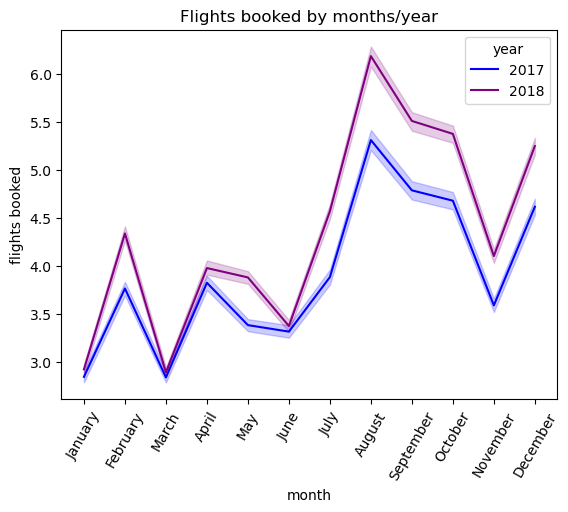

In [97]:
# Elijo lineplot que me parece un gráfico limpio para ver la distribución de dos variables que pueden cambiar en el tiempo.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
sns.lineplot(x = "month", y = "flights booked", hue = "year", data=df_final, palette= ["blue", "purple"])
plt.title("Flights booked by months/year")
plt.xticks(ticks=range(len(month_order)), labels=month_order, rotation=60); # proporciona las posiciones de los tick (marcas de los ejes)

Podemos concluir que la distribución de las reservas de vuelos durante los años 2017 y 2018 sigue una distribución parecida, observando 2 picos, uno en febrero (posibles vacaciones de semana blanca o carnaval), después desde junio a septiembre que empieza a disminuir por vacaciones de verano y luego empieza a repuntar en noviembre siguiendo en diciembre por vacaciones navideñas.
También en líneas generales se han reservado más vuelos en 2018 respecto a 2017.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

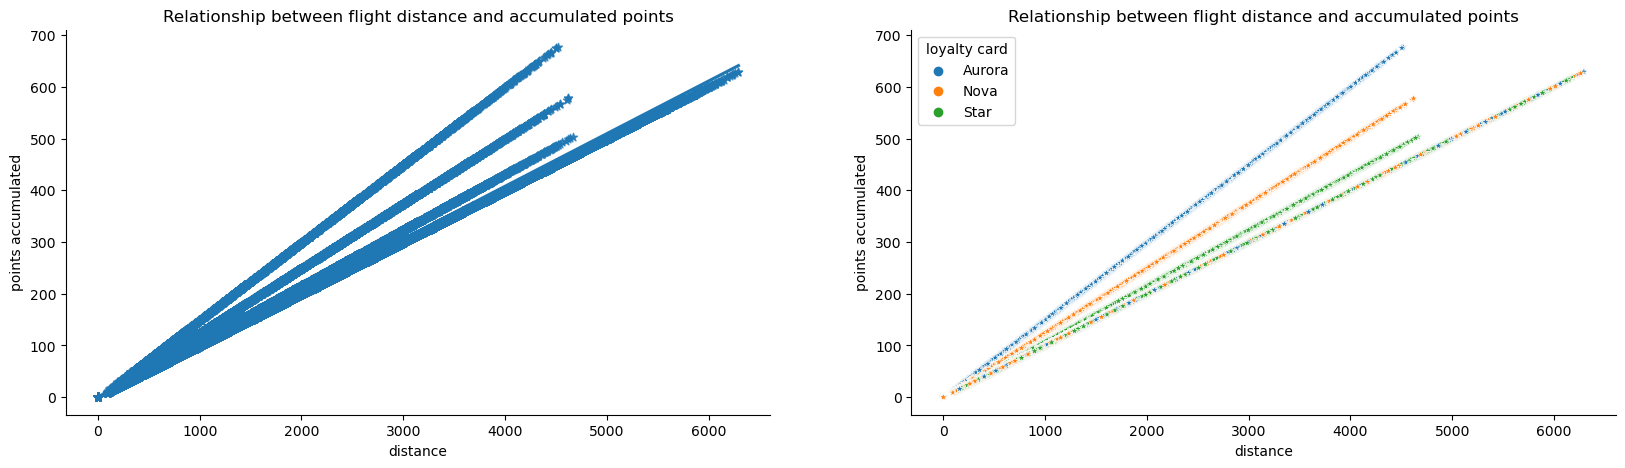

In [98]:
# Vamos a añadir un subplot con 2 gráficos, utilizaré regplot y scatterplot, para medir la relación entre dos variables numéricas.
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.regplot(x = "distance", y = "points accumulated", data = df_final, # no permite hue para valorar por tipo de loyalty card por eso añado scatter
            marker = "*", 
            ax = axes[0] 
            )

# para añadir un título usaremos el parámetro '.set_title()' 
axes[0].set_title("Relationship between flight distance and accumulated points")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[0].set_xlabel("distance")
axes[0].set_ylabel("points accumulated")

# quitamos la linea de la derecha y arriba de la gráfica
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)


# AÑADIMOS LA INFORMACIÓN QUE QUEREMOS EN EL SEGUNDO SUBPLOT, AÑADIENDO EL PARÁMETRO 'AX'.
sns.scatterplot(x = "distance", y = "points accumulated", data = df_final, hue= "loyalty card", 
                marker = "*",  
                ax = axes[1])

# para añadir un título usaremos el parámetro '.set_title()' 
axes[1].set_title("Relationship between flight distance and accumulated points")

axes[1].set_xlabel("distance")

axes[1].set_ylabel("points accumulated")

axes[1].spines['right'].set_visible(False)

axes[1].spines['top'].set_visible(False)

Se observa una relacion directa clara entre distancia recorrida y puntos acumulados, además vemos que con el gráfico scatterplot, el tipo de tarjeta Aurora es el que más puntos acumula por lo que inferimos que es la tarjeta con más beneficios.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [99]:
# Voy a hacer un groupby por provincias y nº clientes para poder hacer el gráfico

df_province = df_final.groupby("province")["loyalty number"].count().reset_index().sort_values(by="loyalty number", ascending=False)
df_province

,province,loyalty number
6,Ontario,130258
1,British Columbia,106442
8,Quebec,79573
0,Alberta,23360
2,Manitoba,15900
3,New Brunswick,15352
5,Nova Scotia,12507
9,Saskatchewan,9861
4,Newfoundland,6244
10,Yukon,2679


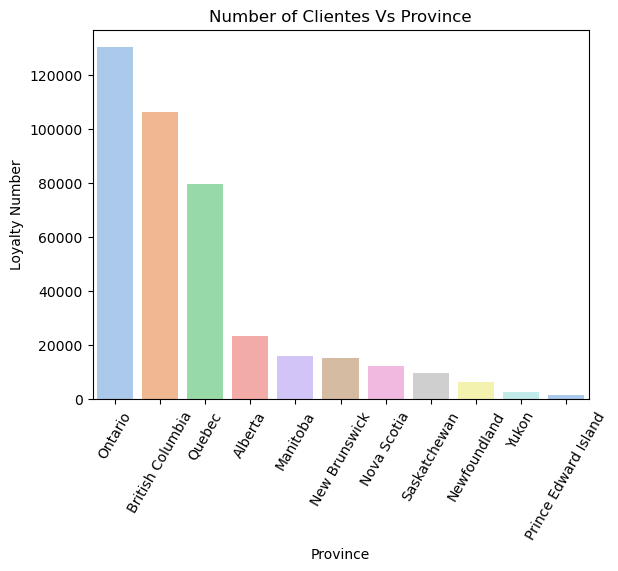

In [100]:
# elijo un barplot que me muestra relaciones entre dos variables una numérica y otra categórica.
sns.barplot(x="province", y="loyalty number", data= df_province, palette="pastel")
plt.xticks(rotation = 60)
plt.xlabel("Province")
plt.ylabel("Loyalty Number")
plt.title("Number of Clientes Vs Province");

La provincia con mayor cantidad de clientes es Ontario, y la que tiene menor cantidad de clientes es Prince Edwardd Island.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [131]:
# Vuelvo a hacer un groupby por educación y salario
df_education = df_final.groupby("education")["salary"].mean().reset_index().sort_values(by = "salary", ascending = False)
df_education["salary"] = df_education["salary"].round(2)
df_education

,education,salary
2,Doctor,178403.68
4,Master,103734.52
1,College,73479.00
0,Bachelor,72599.08
3,High School or Below,61146.38


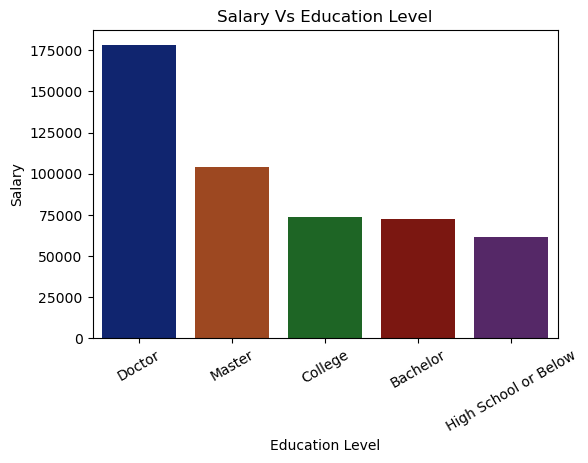

In [132]:
# elijo un barplot que me muestra relaciones entre dos variables una númerica y otra categórica.
plt.figure(figsize =(6,4))
sns.barplot(x="education", y="salary", data=df_education, palette="dark")
plt.xticks(rotation = 30)
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.title("Salary Vs Education Level");

Es clara la relación que se muestra entre el nivel educacional y el salario, aquí cuanto mayor nivel educacional mayor salario. Los de la categoria Doctor tienen una diferencia grande respecto al resto y los que menos tienen son los de nivel educativo de High School.

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [133]:
df_loyalty = df_final.groupby("loyalty card")["loyalty number"].count().reset_index().sort_values(by="loyalty number", ascending=False)
df_loyalty

,loyalty card,loyalty number
2,Star,183745
1,Nova,136883
0,Aurora,83132


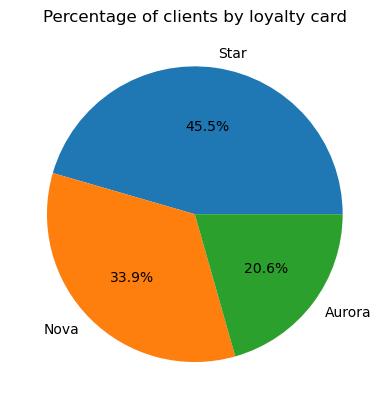

In [138]:
# elijo un pieplot porque son pocas categorias de una variable categorica para mostrar su porcentaje
labels1= ["Star", "Nova", "Aurora"]
plt.pie(x="loyalty number", data=df_loyalty, autopct='%.1f%%', labels=labels1)
plt.title("Percentage of clients by loyalty card");

Aquí vemos que el gran porcentaje de clientes tienen la categoria de loyalty card STAR, que unido a la conclusiónd e la pregunta 2, observamos que será la más económica de mantener, seguido de nivel intermedio NOVA con un 34% de los clientes y por último la categoría superior y que por eso daba más puntos acumulados a los clientes es AURORA que representa un 20.6% de los clientes.

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [135]:
df_marital = df_final.groupby(["marital status", "gender"])["loyalty number"].count().reset_index()
df_marital

,marital status,gender,loyalty number
0,Divorced,Female,30634
1,Divorced,Male,30128
2,Married,Female,117363
3,Married,Male,117482
4,Single,Female,54760
5,Single,Male,53393


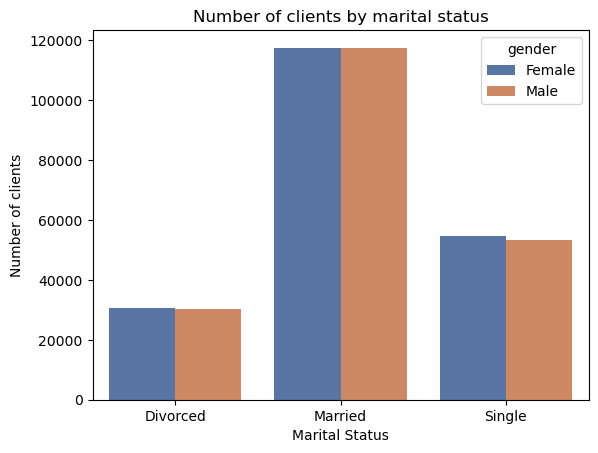

In [137]:
# elijo un barplot que me muestra relaciones entre dos variables.
sns.barplot(x="marital status", y = "loyalty number", data=df_marital, hue="gender", palette="deep")
plt.title("Number of clients by marital status")
plt.xlabel("Marital Status")
plt.ylabel("Number of clients");

La distribución de los clientes es que tenemos en su mayoría clientes casados seguido de solteros, el grupo donde menor clientes tenemos es en divorciados.

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
1. Preparación de Datos:
    - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [142]:
df_ab = df_final[["education","flights booked"]]
df_ab

,education,flights booked
0,Bachelor,3
1,College,10
2,College,6
3,Bachelor,0
4,Bachelor,0
...,...,...
403755,College,0
403756,Doctor,0
403757,Bachelor,3
403758,College,0


In [143]:
df_ab["education"].value_counts()

education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

In [144]:
df_ab["flights booked"].value_counts()

flights booked
0     196128
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

2. Análisis Descriptivo:
    - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [152]:
df_ab.groupby("education")["flights booked"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


Estos valores nos dan los siguientes datos:
- De media, las personas han reservado 4 viajes independientemente del grado educativo.
- En cuanto a la desviación típica son similares en todas las categorías, la dispersión es muy similar en todos los diferentes niveles educativos, y su dispersión respecto a la media es alta.
- Mínimo: 0 puede ser que hay categorías sin vuelos registrados.
- Máximo: 21 vuelos registrados en una categoría.

A nivel general no hay grandes diferencias en la reserva de vuelos por nivel educativo.

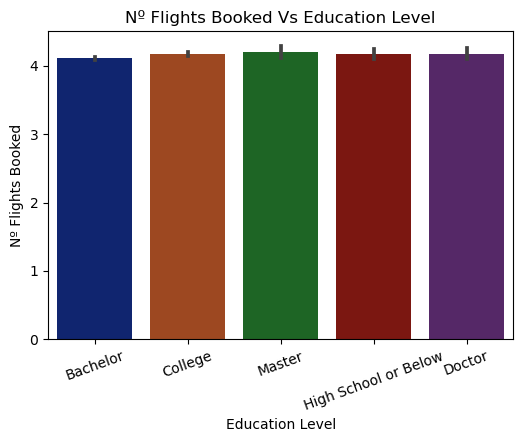

In [157]:
plt.figure(figsize =(6,4))
sns.barplot(x="education", y="flights booked", data=df_ab, palette="dark")
plt.xticks(rotation = 20)
plt.xlabel("Education Level")
plt.ylabel("Nº Flights Booked")
plt.title("Nº Flights Booked Vs Education Level");

Seguimos comprobando que a nivel general no hay grandes diferencias en la reserva de vuelos por nivel educativo.

3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.